In [1]:
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [2]:
def plot_hist(values, title):
    sns.distplot(values, kde=False, hist_kws={"edgecolor": "k", "range": [0,1]}).set_title(title)

#### 14.1  The sensitivity and specificity of a test for a disease

##### 14.1.2 Write Gibbs sampler

In [3]:
def get_next_samples(a, b, a_pi, b_pi, a_S, b_S, a_C, b_C, pi, S, C):
    Y1_prob = (pi*S)/ (pi*S + (1-pi)*(1-C))
    Y1 = stats.binom.rvs(a, Y1_prob, 0, 1)
    Y2_prob = (pi*(1-S))/ (pi*(1-S) + (1-pi)*C)
    Y2 = stats.binom.rvs(b, Y2_prob, size=1)
    pi_calc = stats.beta.rvs(Y1+Y2+a_pi, a+b-Y1-Y2+b_pi, size=1)
    S_calc = stats.beta.rvs(Y1+a_S, Y2+b_S, size=1)
    C_calc = stats.beta.rvs(b-Y2+a_C, a-Y1+b_C, size=1)
    
    return pi_calc[0], S_calc[0], C_calc[0]

In [4]:
def sampler(a, b, a_pi, b_pi, a_S, b_S, a_C, b_C, iters=10000):
    pis = [np.random.uniform(0, 1, 1)[0]]
    Ss = [np.random.uniform(0, 1, 1)[0]]
    Cs = [np.random.uniform(0, 1, 1)[0]]
    
    for i in range(iters):
        pi, S, C = get_next_samples(a, b, a_pi, b_pi, a_S, b_S, a_C, b_C, pis[-1], Ss[-1], Cs[-1])
        pis.append(pi)
        Ss.append(S)
        Cs.append(C)
        
    return pis, Ss, Cs

##### 14.1.3 Generate $\pi$ posterior for uninformative priors

In [5]:
a = 20
b = 80

In [6]:
pi, S, C = sampler(a, b, 1, 1, 1, 1, 1, 1)

C:\Users\sendi\miniconda3\envs\bayes\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


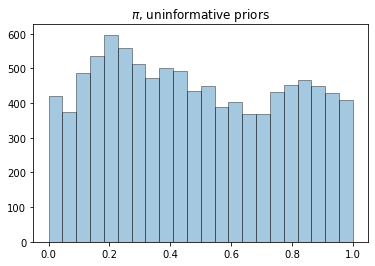

In [7]:
plot_hist(pi, '$\pi$, uninformative priors')

##### 14.1.4 Generate $\pi$ posterior for beta(10, 1) priors on S and C

In [8]:
pi, S, C = sampler(a, b, 1, 1, 10, 1, 10, 1)

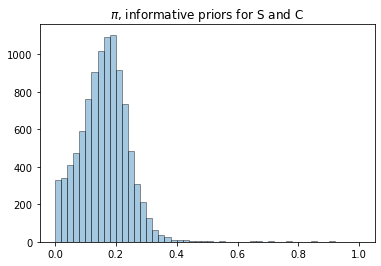

In [9]:
plot_hist(pi, '$\pi$, informative priors for S and C')

##### 14.1.5 Generate S and C posterior for informative prior on $\pi$

In [10]:
pi, S, C = sampler(a, b, 1, 10, 1, 1, 1, 1)

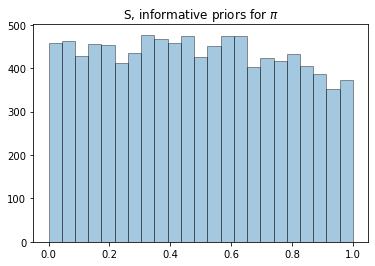

In [11]:
plot_hist(S, 'S, informative priors for $\pi$')

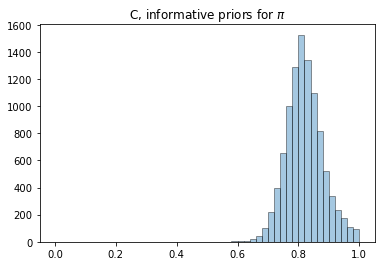

In [12]:
plot_hist(C, 'C, informative priors for $\pi$')

##### 14.1.6  Generate S posterior for informative prior on $\pi$ and C

In [13]:
pi, S, C = sampler(a, b, 1, 10, 1, 1, 10, 1)

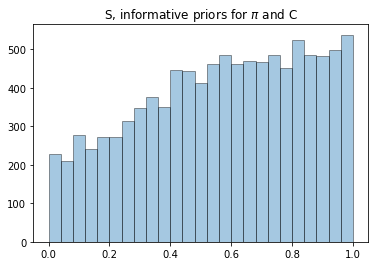

In [14]:
plot_hist(S, 'S, informative priors for $\pi$ and C')

##### 14.1.7 Increase sample size

In [ ]:
pi, S, C = sampler(200, 800, 1, 10, 1, 1, 10, 1)

In [ ]:
plot_hist(S, 'S, informative priors for $\pi$ and C')

In [15]:
pi, S, C = sampler(200, 800, 1, 10, 1, 1, 10, 1)

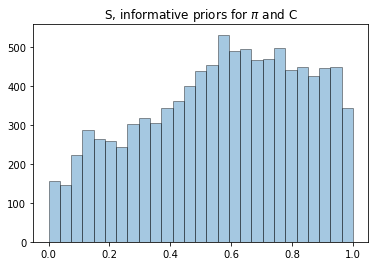

In [16]:
plot_hist(S, 'S, informative priors for $\pi$ and C')